 <h1 style="text-align:center;">Assignment 2</h1>
 <p style ="text-align:right;"> <b>Name</b>&nbsp;&ensp;&emsp;&emsp;&emsp;:&emsp;Abhijeet Sahdev <br> <b>Reg No.</b>&nbsp;&ensp;&ensp;&ensp;&ensp;&emsp;:&ensp;&ensp;170905316&emsp;&emsp;&emsp;<br> <b> Department</b> :&nbsp;&emsp;&emsp;CSE&emsp;&emsp;&emsp;&emsp;&emsp;</p>

#### <p>1) Consider CO<sub>2</sub> readings. Use a 6-period moving average to smoothen the data. Plot graphs for the original and smoothened data on the same the axes. Highlight the differences observed. Repeat the procedure with a 3 period moving average. Comment on the effect of changing the span of moving average.

    Year  Avg CO2(ppmv)    YMT_6   CMA_6   SMA_3
0   1959         316.00      NaN     NaN     NaN
1   1960         316.91      NaN     NaN     NaN
2   1961         317.63      NaN     NaN  316.85
3   1962         318.46  1907.54  318.26  317.67
4   1963         319.02  1911.63  318.97  318.37
5   1964         319.52  1916.06  319.72  319.00
6   1965         320.09  1920.56  320.48  319.54
7   1966         321.34  1925.21  321.33  320.32
8   1967         322.13  1930.79  322.31  321.19
9   1968         323.11  1936.92  323.34  322.19
10  1969         324.60  1943.15  324.37  323.28
11  1970         325.65  1949.33  325.51  324.45
12  1971         326.32  1956.81  326.73  325.52
13  1972         327.52  1963.99  327.88  326.50
14  1973         329.61  1970.55  328.97  327.82
15  1974         330.29  1977.08  330.14  329.14
16  1975         331.16  1984.64  331.44  330.35
17  1976         332.18  1992.64  332.71  331.21
18  1977         333.88  1999.92  334.02  332.41
19  1978         335

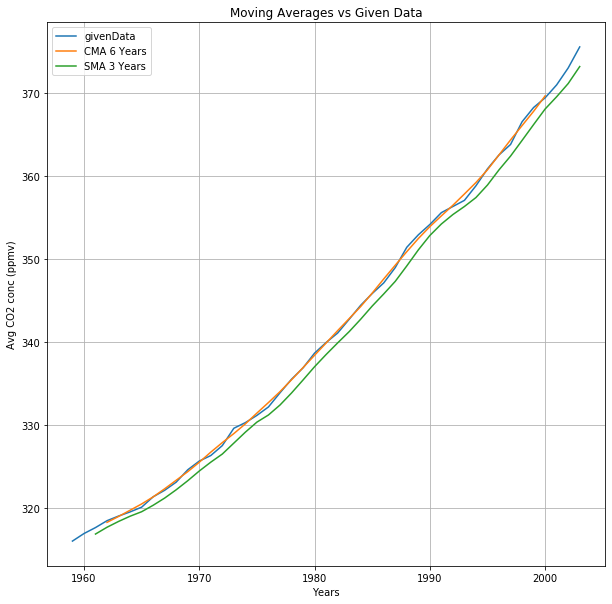

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


#read in dataset
co2_readings_per_year = pd.read_csv('Datasets/Assignment2_1_CO2_Data.csv')
time_periods = [6,3]

#variables for computing CMA_6
values = 0

#moving average with different periods
co2_readings_per_year['YMT_6'] = co2_readings_per_year.iloc[:,1].rolling(window = time_periods[0],center = True).sum()
co2_readings_per_year.fillna(0,inplace = True)

for i in range(0,co2_readings_per_year.shape[0]-1):
    if(i < (time_periods[0]/2)):
        co2_readings_per_year.loc[i,'CMA_6'] = 0;
    elif((co2_readings_per_year.loc[i+1,'YMT_6'] == 0)):
         co2_readings_per_year.loc[i,'CMA_6'] = 0
    else:
         co2_readings_per_year.loc[i,'CMA_6'] = np.round((co2_readings_per_year.loc[i,'YMT_6'] + co2_readings_per_year.loc[i+1,'YMT_6'])/(time_periods[0]*2),2)

co2_readings_per_year.replace(0,np.nan,inplace = True)
co2_readings_per_year['SMA_3'] = co2_readings_per_year.iloc[:,1].rolling(window = time_periods[1]).mean().round(decimals = 2)

#displaying first 10 rows

print(co2_readings_per_year)

#plotting 
plt.figure(figsize=[10,10])
plt.title("Moving Averages vs Given Data")
plt.xlabel('Years')
plt.ylabel('Avg CO2 conc (ppmv)')
plt.grid(True)
plt.plot(co2_readings_per_year['Year'],co2_readings_per_year["Avg CO2(ppmv)"],label = 'givenData')
plt.plot(co2_readings_per_year['Year'],co2_readings_per_year['CMA_6'],label = 'CMA 6 Years')
plt.plot(co2_readings_per_year['Year'],co2_readings_per_year['SMA_3'],label = 'SMA 3 Years')
plt.legend(loc = 2)
plt.show()

<p> 

<p>  Observations : </p>
<ul>
    <li> Comparing <code> givenData </code> and <code>SMA 3 Years,</code>the number of spikes in the latter are less and the curve takes a <b>smoothened shape</b>.</li>
    <li> Comparing <code> SMA 3 years </code> and <code> CMA 6 Years,</code>the <b>number of spikes have further reduced</b> upon increasing the time span. Although, the values in the <b>latter</b> are closer to the <code>givenData </code>.</li>
</ul>
</p>

#### <p>2) Consider Crime Data readings. Use a 10-period moving average to smoothen the data. Plot graphs for the original and smoothened data on the same the axes. Highlight the differences observed.Repeat the procedure with a 4 period moving average. Comment on the effect of changing the span of moving average.<p>

    Year  VCR(per 100000p)  YMT_10  CMA_10   YMT_4   CMA_4
0   1984             539.9     NaN     NaN     NaN     NaN
1   1985             558.1     NaN     NaN     NaN     NaN
2   1986             620.1     NaN     NaN  2330.6  595.24
3   1987             612.5     NaN     NaN  2431.3  621.42
4   1988             640.6     NaN     NaN  2540.1  648.71
5   1989             666.9  6630.7  671.76  2649.6  680.61
6   1990             729.6  6804.4  686.76  2795.3  713.46
7   1991             758.2  6930.8  693.90  2912.4  738.12
8   1992             757.7  6947.3  694.66  2992.6  746.15
9   1993             747.1  6945.8  690.93  2976.6  734.94
10  1994             713.6  6872.8  680.08  2902.9  710.59
11  1995             684.5  6728.9  661.74  2781.8  678.44
12  1996             636.6  6505.8  637.90  2645.7  643.17
13  1997             611.0  6252.1  612.05  2499.7  604.74
14  1998             567.6  5988.8  585.31  2338.2  568.29
15  1999             523.0  5717.5  559.23  2208.1  538.

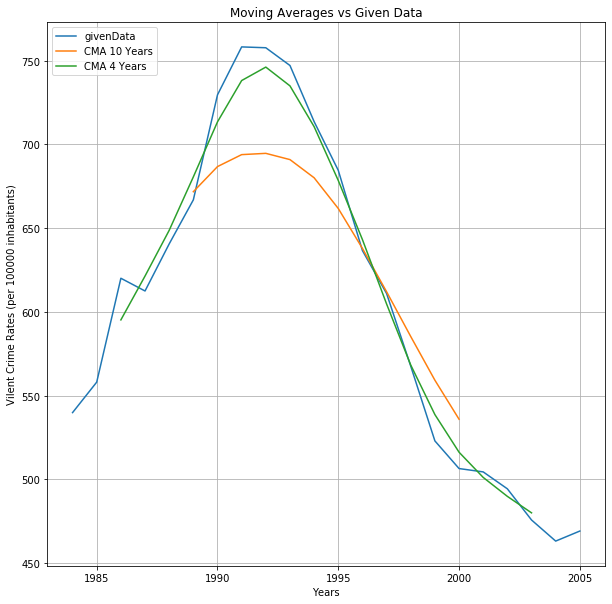

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

#read in dataset
crime_rates_per_year = pd.read_csv('Datasets/Assignment2_2_Crime_Data.csv')
time_periods = [10,4,2]

#moving average with different periods
crime_rates_per_year['YMT_10'] = crime_rates_per_year.iloc[:,1].rolling(window = time_periods[0],center = True).sum()
for i in range(0,crime_rates_per_year.shape[0]-1):
    if(i < (time_periods[0]/2)):
        crime_rates_per_year.loc[i,'CMA_10'] = 0;
    elif((crime_rates_per_year.loc[i+1,'YMT_10'] == 0)):
        crime_rates_per_year.loc[i,'CMA_10'] = 0
    else:
        crime_rates_per_year.loc[i,'CMA_10'] = np.round((crime_rates_per_year.loc[i,'YMT_10'] + crime_rates_per_year.loc[i+1,'YMT_10'])/(time_periods[0]*2),2)

crime_rates_per_year['YMT_4'] = crime_rates_per_year.iloc[:,1].rolling(window = time_periods[1],center = True).sum()
for i in range(0,crime_rates_per_year.shape[0]-1):
    if(i < (time_periods[1]/2)):
        crime_rates_per_year.loc[i,'CMA_4'] = 0;
    elif((crime_rates_per_year.loc[i+1,'YMT_4'] == 0)):
        crime_rates_per_year.loc[i,'CMA_4'] = 0
    else:
        crime_rates_per_year.loc[i,'CMA_4'] = np.round((crime_rates_per_year.loc[i,'YMT_4'] + crime_rates_per_year.loc[i+1,'YMT_4'])/(time_periods[1]*2),2)


crime_rates_per_year.replace(0,np.nan,inplace = True)
#crime_rates_per_year['SMA_10'] = crime_rates_per_year.iloc[:,1].rolling(window = time_periods[0],center = True).mean()
#displaying first 15 rows
print(crime_rates_per_year)

#plotting 
plt.figure(figsize=[10,10])
plt.title("Moving Averages vs Given Data")
plt.xlabel('Years')
plt.ylabel('Vilent Crime Rates (per 100000 inhabitants)')
plt.grid(True)
plt.plot(crime_rates_per_year['Year'],crime_rates_per_year["VCR(per 100000p)"],label = 'givenData')
plt.plot(crime_rates_per_year['Year'],crime_rates_per_year['CMA_10'],label = 'CMA 10 Years')
plt.plot(crime_rates_per_year['Year'],crime_rates_per_year['CMA_4'],label = 'CMA 4 Years')
plt.legend(loc = 2)
plt.show()

<p>  Observations : </p>
<ul>
    <li> Comparing <code> givenData </code> and <code>CMA 4 Years,</code>the number of spikes in the latter are less and the curve takes a <b>smoothened shape</b>.</li>
    <li> Comparing <code> CMA 4 years </code> and <code> CMA 10 Years,</code>the <b>number of spikes have further reduced</b> upon increasing the time span.The curves takes a smoother shape with 10 years as period. Although, the values in <code> CMA 4 </code> are closer to the <code> givenData </code>.</li>
</ul>    
</p>

#### <p>3) Consider the N-span moving average applied to uncorrelated data with mean &mu; and variance &#963;<sup>2</sup>. Show that the variance of the moving averages is <i>Var( M<sub>t</sub> ) = &#963;<sup>2</sup>/N</i>. $ M_t =\frac{1}{N}(y_T + y_{T-1}...+ y_{T-N+1})$, y<sub>i</sub></i>'s are observations give. </p>

<b>Sol</b>: <br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
$ M_t =\frac{1}{N}\sum \limits _{i=T-N+1} ^{T}y_{t} $
<br>
<br>
<u>Variance of M</u><sub>T</sub>,<br> 
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$\begin{aligned}
Var(M_t)  &=  Var(\frac{1}{N}\sum \limits _{i=T-N+1} ^{T}y_{t}) \\
&= \frac{1}{N^2}\sum \limits _{i = T-N+1} ^{T} Var(y_{i}) \\
&= \frac{1}{N^2}.N.\sigma^2 \\
&=\frac{1}{N}.\sigma^2
\end{aligned}$ <br>&emsp;&emsp;
(Var( y<sub>i</sub> ) are equal)



#### 4) Consider the process <i>X(t) = A<sub>1</sub> + A<sub>2</sub>t + A<sub>3</sub>t<sup>3</sup></i>, where <i> A<sub>i</sub></i> are random uncorrelated random variables with mean 0 and variance 1. Find the mean value function and covariance function of the process. 

<b>Sol</b>: <br>
&emsp;&emsp;<u> Given </u>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<ol>
<li>$E[A_{i}] = 0 $</li>
<li>$Var[A_{i}] = 1 $</li> 
<li>$ Cov(A_{i},A_{j}) = 0 $ , if i &ne; j</li>
</ol>
<p> 1,2 => $ E[A_{i}^2] = 1 $ <br>
    3 => $ E[A_{i}A_{j}] = E[A_{i}]E[A_{j}]$ <br>
</p><br>
<u>Mean Value Function</u><br> 
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
$\begin{aligned}
E[X(t)] &= E[ A_{1} + A_{2}t + A_{3}t^3]\\
&= E[A_{1}] + E[A_{2}].t + E[A_{3}].t^3 \\
&= 0 + 0.t + 0.t^3 \\
&= 0
\end{aligned}$<br><br>
&emsp;&emsp;<u>Covariance Function</u><br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
$\begin{aligned}
Cov(X(t_{1}),X(t_{2})) &= E[X(t_{1})X(t_{2})] - E[X(t_{1})].E[X(t_{2})] \\
&= E[X(t_{1})X(t_{2})] - 0.0 \\
&= E[(A_{1}+A_{2}t_{1}+A_{3}t_{1}^3)(A_{1}+A_{2}t_{2}+A_{3}t_{2}^3)] \\
&= E[A_{1}^2 + A_{1}A_{2}t_{2}+ A_{1}A_{3}t_{2}^3 + A_{2}A_{1}t_{1} + A_{2}A_{3}t_{1}t_{2}^3 + A_{2}^2t_{1}t_{2} + A_{1}A_{3}t_{1}^3 + A_{2}A_{3}t_{1}^3t_{2} + A_{3}^2t_{1}^3t_{2}^3]\\ 
&= 1 + t_{1}t_{2} + t_{1}^3t_{2}^3
\end{aligned}$ 

#### 5) Let <i>C</i> be a non-closed communicating class. Show that no state in C can be recurrent.

 <p><b>Sol:</b> <ul> <li>Consider <b>C</b>, a non- closed communicating class. Consider the states <b>i,j</b>  s.t. <b>i &in; C ,j &notin; C </b>and <b>i&#8594;j</b>. </li> 
    <li>This implies that <b>&exist; m &in; N</b> s.t. <b> p<sub>ij</sub><sup>(m)</sup> = P<sub>i</sub>[X<sub>m</sub>=j]>0 </b>.</li>  
    <li>If the event <b>{ X<sub>m</sub> = j }</b> occurs,  then after time <i><b>m</b></i>, chain cannot return to state <b>i</b>; otherwise <b>i</b> and <b>j</b> would be in the same communicating class.</li> (contradicts with our assumption).
    <li>It follows that <b>P<sub>i</sub> [ { X<sub>m</sub> = j } ∩ { X<sub>n</sub> = i for infinitely many n } ] = 0 </b>.</li>
    <li> This implies that <b>P<sub>i</sub>[X<sub>n</sub>= i for infinitely many n] &lt; 1.</b></li>
    <li>Therefore, state i is not recurrent.Thus implying no state in C can be recurrent.</li>
   
   </ul> </p>